Análisis de tópicos en las revistas Brando y Ohlalá!

In [3]:
#import json
#from nltk.corpus import stopwords
#from nltk.stem import SnowballStemmer
#import unicodedata2
#import string
#from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.decomposition import LatentDirichletAllocation
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.metrics import confusion_matrix, f1_score, classification_report
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from libs.Cleaner import Cleaner
from libs.LdaWraper import LDA_wrapper

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors
from pprint import pprint
#import pyLDAvis.gensim
#import pyLDAvis.sklearn
#import re
#import pickle
#from tqdm import tqdm
%matplotlib inline

In [4]:
# Leemos los corpus de las dos revistas Brando y Ohlala
dict_brando = pd.read_pickle("../data/brando.p")
dict_ohlala = pd.read_pickle("../data/ohlala.p")

df_hombres = pd.DataFrame.from_dict(dict_brando, orient='index')
df_hombres.columns = ["revista", "fecha", "titulo", "articulo"]
df_mujeres = pd.DataFrame.from_dict(dict_ohlala, orient='index')
df_mujeres.columns = ["revista", "fecha", "titulo", "articulo"]
# concatenamos las dos revistas para mirar que tenemos por años ....
df_corpus = pd.concat([df_hombres, df_mujeres])
df_corpus = df_corpus.sort_values(by=["fecha"], ascending=[True]).reset_index(drop=True)
df_corpus['year'] = df_corpus.fecha.str.slice(0, 4)
#limpio el articulo
df = df_corpus[['year','revista','articulo', "titulo"]].reset_index(drop=True)
cleaner = Cleaner()
df['text_clean'] = cleaner.data_clean(data=df['articulo'],stemming=True)
df['text_clean'].replace('', np.nan, inplace=True)
df.dropna(subset=['text_clean'], inplace=True)
#limpio el título
df['title_clean'] = cleaner.data_clean(data=df['titulo'],stemming=True)
df['text_clean'] =  df.apply(lambda x: str(x['title_clean']+ " ")*3 + x['text_clean'],axis = 1)

de-stemming: 100%|███████████████████████████████████████████████████████████| 30078/30078 [00:00<00:00, 320923.41it/s]


In [5]:
texts = df['text_clean'].values

---------

In [6]:
wraper = LDA_wrapper()

In [7]:
lda_model, stemming = wraper.lda(data=texts,max_iter = 50,n_components=100,stemming = True)

iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50
iteration: 16 of max_iter: 50
iteration: 17 of max_iter: 50
iteration: 18 of max_iter: 50
iteration: 19 of max_iter: 50
iteration: 20 of max_iter: 50
iteration: 21 of max_iter: 50
iteration: 22 of max_iter: 50
iteration: 23 of max_iter: 50
iteration: 24 of max_iter: 50
iteration: 25 of max_iter: 50
iteration: 26 of max_iter: 50
iteration: 27 of max_iter: 50
iteration: 28 of max_iter: 50
iteration: 29 of max_iter: 50
iteration: 30 of max_iter: 50
iteration: 31 of max_iter: 50
iteration: 32 of max_iter: 50
iteration: 33 of max_iter: 50
iteration: 34 of ma

In [11]:
#wraper.save_model(lda_model, "lda_model50t.p")
#wraper.save_model(lda_model, "lda_model100t.p")

#wraper.save_model(lda_model, "lda_model.p")
lda_model = wraper.restore_model("lda_model50t.p")
#lda_model = wraper.restore_model("lda_model100t.p")
#stemming = True

In [12]:
data_vectorized, vectorizer = wraper.data_vectorizer(data=texts, stem = True)

In [13]:
doc_dist = lda_model.transform(data_vectorized)
words = vectorizer.get_feature_names()
topic_dist = lda_model.components_

ValueError: The provided data has 28074 dimensions while the model was trained with feature size 28005.

In [ ]:
wraper.lda_vis(lda_model,data_vectorized, vectorizer)

In [ ]:
wraper.display_topics(lda_model, words, 10)

In [88]:
#50 topicos
#wraper.display_topics(lda_model, words, 10,subset=[0,13,18,20,22,31,33,38])
#100 topicos
wraper.display_topics(lda_model, words, 10,subset=[1,4,5,7,21,50,71,82, 87,88,93])

Topic 1:
natalia hot ana emma romina versus diez camilo morochas mega
Topic 4:
empresa redes sistema comprar productos mercado traves tecnologia permite desarrollo
Topic 5:
version auto marca modelo presente equipo llego motor argentina electrica
Topic 7:
ninos adultos educativo colegio chiquito padre secuestro change sauna pegote
Topic 21:
moda diseno estilo marca coleccion ropa tendencia prendas rosa zapatillas
Topic 50:
hijos madre mama padre bebe familia papa embarazo regalo anos
Topic 71:
anos argentina mundo historia pais publico primera habia libro mundial
Topic 82:
estudio problema trabajo explica ley medico social generar desarrollo investigar
Topic 87:
clases curso aprender estudio taller enseno labial alumnos profesor docente
Topic 88:
cocina queso com recetas platos carne cafe pan leche sabor
Topic 93:
juego jugar futbol cancha programa ganas copa radio pelota gol


## Topicos a revisar:


#Con 50 topicos
tracker = {         
0: "Internet",           
18: "Futbol",             
20: "Sexualidad",             
31: "tecnología",               
33: "Autos",           
38: "Recetas"}

In [89]:
#Con 100 topicos
tracker = {
1: "objetivacion mujer",
4:"Negocios",
5: "Autos",
7: "Niños",
21: "Moda",
50: "Familia",
71: "Sociedad",
82: "Investigación",
93: "Futbol"}

In [90]:
label_revista = df.revista.values

In [91]:
label_revista = df.revista.values
brando_mask = label_revista == 'brando'

In [92]:
brando_dist = doc_dist[brando_mask]
ohlala_dist = doc_dist[~brando_mask]

mean_dist_ohlala =ohlala_dist.mean(axis=0)
mean_dist_brando =brando_dist.mean(axis=0)

Topico  objetivacion mujer
Ohlala:  0.0023258404184675076
Brando:  0.007611777449767145
--------------
Topico  Negocios
Ohlala:  0.015715123861741936
Brando:  0.07061636720316564
--------------
Topico  Autos
Ohlala:  0.014901074953392046
Brando:  0.08605076764288212
--------------
Topico  Niños
Ohlala:  0.001977879749437991
Brando:  0.001363130220478322
--------------
Topico  Moda
Ohlala:  0.023259785616636053
Brando:  0.015236584780637545
--------------
Topico  Familia
Ohlala:  0.013361250243508666
Brando:  0.005821664595875425
--------------
Topico  Sociedad
Ohlala:  0.01867745647559115
Brando:  0.0791390045986649
--------------
Topico  Investigación
Ohlala:  0.01612829933487573
Brando:  0.02865317855507188
--------------
Topico  Futbol
Ohlala:  0.0038286687151970564
Brando:  0.009210964399094959
--------------


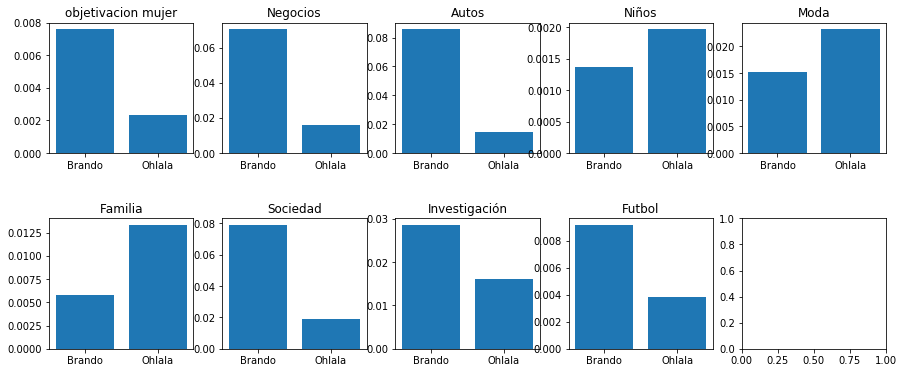

In [93]:
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)

axs = axs.ravel()

for i,topic in enumerate(tracker.keys()):
    print("Topico ", tracker[topic])
    axs[i].bar(["Ohlala", "Brando"], [mean_dist_ohlala[topic], mean_dist_brando[topic]])
    axs[i].set_title(tracker[topic])
    print("Ohlala: ", mean_dist_ohlala[topic])
    print("Brando: ", mean_dist_brando[topic])
    print("--------------")


In [179]:
def topics_df(df, tracker, doc_dist):
    topics2track = list(tracker.keys())
    df_topics = df[["year","revista"]].reset_index(drop = True)
    doc_topics = pd.DataFrame([doc[list(tracker.keys())] for doc in doc_dist])
    doc_topics.columns = list(tracker.values())
    df_topics = pd.concat([df_topics, doc_topics], axis=1)
    results = df_topics.groupby(['year','revista']).mean()
    results.to_csv("results/topicos_results.csv")
    df_topics.to_csv("results/topicos_results_all.csv")
    return results, df_topics

In [181]:
results, df_topics = topics_df(df, tracker, doc_dist)

Me guardo los resultados para graficarlos en ggplot!